In [ ]:
! mkdir -p datasets
%cd datasets
! wget -nc https://raw.githubusercontent.com/pablonoya/zigzag-ml/master/datasets/housing.csv
%cd ..

# ¿Cómo probamos un modelo?
La mejor manera de probar un modelo es **utilizarlo el mundo real**, mandarlo a enfrentar la vida prediciendo nuevos datos que no haya visto durante su entrenamiento 😃.

Obtener estos datos puede ser muy complicado, y si el modelo no rindiera bien tendremos que realizar ajustes como elegir diferentes *features* y volver a conseguir más datos.

Pero esta sigue siendo la mejor manera de evaluar, vamos a engañar al modelo diciéndole que **no tenemos todo el dataset** 😏.  
**Reservaremos una parte** que no utilizará durante el entrenamiento, el **test set** o conjunto de prueba.  
Por supuesto, el otro conjunto será el **training set** o conjunto de entrenamiento.

![training_test_set](img/3.1_train_test_set.png)

# Separando training y test
Con frecuencia, se divide el dataset en **80% para training y 20% para test**, y particiones de 70-30 o 60-40 también son habituales, dependiendo a la cantidad de ejemplos en nuestro dataset y qué tan preciso deseamos que sea.

Pero **antes debemos mezclarlo** como una baraja de naipes 🃏, ¿por qué? porque necesitamos una **muestra aleatoria que represente en general** a todo el conjunto de datos.  
Imaginemos que los datos fueron tomados por zonas y en orden, la última parte podrían ser las viviendas de una sóla zona, y esta podría **faltar en el entrenamiento**. Entonces nuestro modelo **no aprendería** de ella.

Esta diversidad de datos es importante, si faltará cualquier tipo de ejemplos, el modelo simplemente no la conocería.

## Primero mezclamos
Sea n el tamaño del dataset.  
Creamos un array de 0 a n-1 que contiene los **indices**, lo mezclamos al azar y reemplazamos **X** e **y** con los **indices desordenados**, es importante que sean los **mismos indices**, cada **X** mantiene su correspondiente **y**.

In [1]:
import pandas as pd
data_housing = pd.read_csv('./datasets/housing.csv')

X = data_housing['median_income']
y = data_housing['median_house_value']

# ¿cuántos datos tenemos?
n = len(X)
print(n)

20640


In [2]:
import numpy as np
# array de 0 a n-1
indices = np.arange(n)

print(indices[:5], "...", indices[-3:])

[0 1 2 3 4] ... [20637 20638 20639]


In [3]:
# desordenamos
np.random.shuffle(indices)

print(indices[:5], "...")

# reemplazamos
X = X[indices]
y = y[indices]

[19271 17802  9514  5388 10607] ...


Ejecuta de nuevo la celda anterior, para comprobar la aleatoriedad.

## Entonces dividimos  
Dividamos en 80-20, necesitamos el indice que marque dónde se ubica este 80%  
Tanto **train set** como **test set** son términos que agrupan a las *features* y *labels*, por lo que compartirán índices en sus respectivos conjuntos.

In [4]:
# el índice debe ser entero
training_size = int(n * 0.8)

# seleccionamos el primer 80%
X_train = X[:training_size]
y_train = y[:training_size]

# y el 20% restante
X_test = X[training_size:]
y_test = y[training_size:]

print(f"Número de datos de entrenamiento: {len(X_train)}, y de prueba: {len(X_test)}")

Número de datos de entrenamiento: 16512, y de prueba: 4128


**Veamos ambos conjuntos** con gráficas de dispersión, como vimos en el ejemplo de la recta, podemos sobreponer gráficas llamándolas una después de otra.

Text(0.5, 1.0, 'Conjuntos de entrenamiento y prueba')

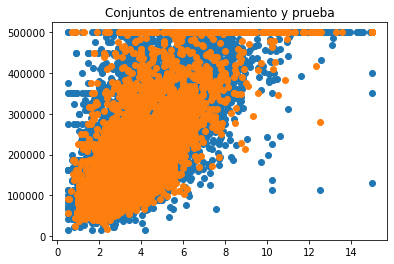

In [5]:
import matplotlib.pyplot as plt

# primero entrenamiento pues es un conjunto más grande
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.title("Conjuntos de entrenamiento y prueba")

Ambos conjuntos son representativos, ¿verdad?

## Probando, probando
Primero entrenamos **sólo y únicamente en el train set**.  

Luego predecimos y calculamos el **MSE** usando los datos no vistos, el **test set**.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#reshape again
X_train_2D = X_train.values.reshape(-1, 1)
X_test_2D = X_test.values.reshape(-1, 1)

# entrenamiento
model = LinearRegression()
model.fit(X_train_2D, y_train)

# prueba!
y_hat = model.predict(X_test_2D)
print(f"MSE (test set) {mean_squared_error(y_hat, y_test) :.2f}")

MSE (test set) 6879635556.54


Esta cantidad es más fiable, como el modelo no conoce estos datos, podemos decir que  nuestro modelo ha enfrentado la vida real 😃 (siempre que tus datos sean reales 😅).

## Separar en entrenamiento y prueba
Sci-kit learn es bastante útil para realizar machine learning por su **colección de funciones** y `train_test_split` nos permite realizar justo lo que acabamos de ver. Recibe como argumentos las *features*, *labels* y el tamaño, en una escala de 0 a 1, del conjunto de prueba en `test_size`, o el de entrenamiento en `train_size`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)
len(X_train)

## Ejercicios
Calcula el MSE en el conjunto de entrenamiento, ¿este sube es mejor o pero que en el de prueba?, ¿por qué crees que sea?

In [ ]:
# lo mismo pero con otra variable


**¡Importante!**  
No es bueno que tus datos aleatorios varíen tanto, incluír o no ciertos datos podría afectar a tus pruebas y hacer que los resultados no sean [reproducibles](https://es.wikipedia.org/wiki/Reproducibilidad_y_repetibilidad), esto es, que sean diferentes cada vez que los ejecutas.  
Puedes cuidarte de esto usando una  **implementando una** [semilla aleatoria](https://es.wikipedia.org/wiki/Semilla_aleatoria), crea una para este capítulo

In [ ]:
# defíne la semilla aparte


In [ ]:
# y entonces realiza tus pruebas


## Mejoremos el modelo
Con las pruebas realizadas es natural que busquemos alguna manera de **mejorar los resultados**, y existe algo que puede ser mejor que elegir y combinar features: crear [nuevas features](4_Creando_features.ipynb).